k: 2, mse: 0.06 psnr: 12.15
k: 3, mse: 0.05 psnr: 13.21
k: 4, mse: 0.04 psnr: 14.42
k: 5, mse: 0.03 psnr: 15.59
k: 6, mse: 0.02 psnr: 16.61
k: 7, mse: 0.02 psnr: 17.70
k: 8, mse: 0.01 psnr: 18.48
k: 9, mse: 0.01 psnr: 19.17
k: 10, mse: 0.01 psnr: 19.70
k: 11, mse: 0.01 psnr: 20.18


11

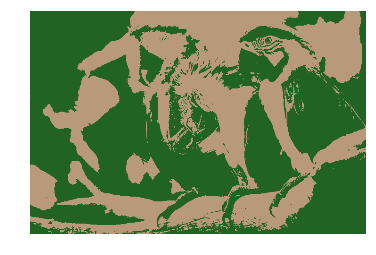

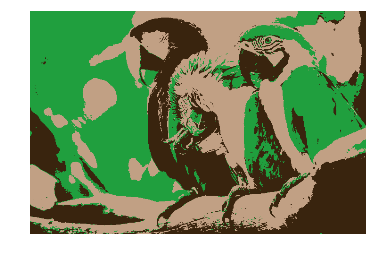

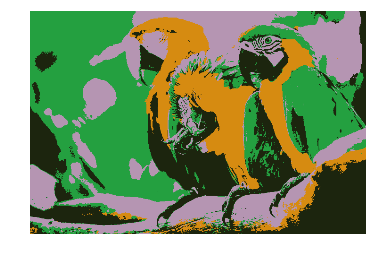

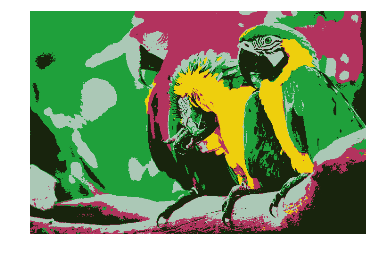

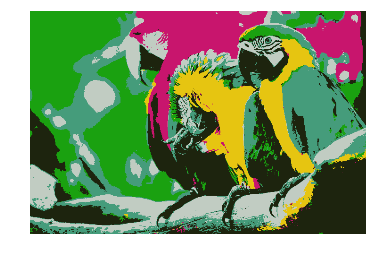

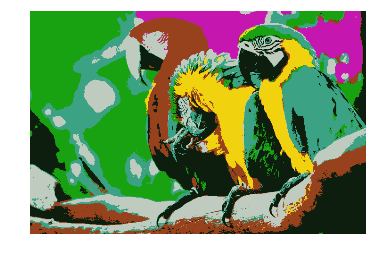

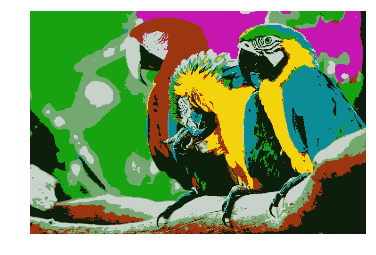

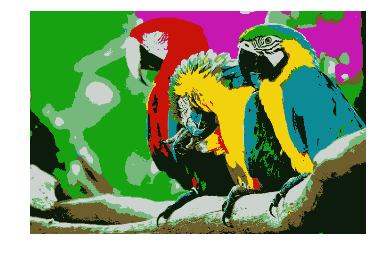

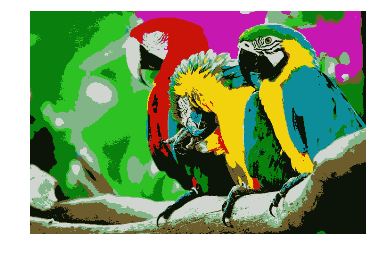

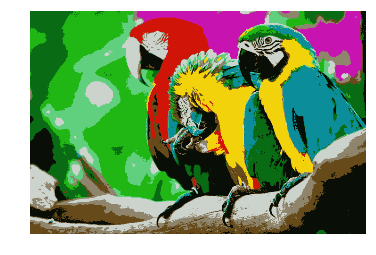

In [2]:
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import numpy as np
from sklearn.metrics import mean_squared_error
import os

if not os.path.exists('plots'):
    os.makedirs('plots')

def recreate_image(codebook, labels, w, h, d):
    """Recreate the (compressed) image from the code book & labels"""
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def plot(image, fname):
    plt.figure()
    plt.axis('off')
    plt.imshow(image)
    plt.savefig(fname)
    
image = imread('parrots.jpg')
image = img_as_float(image)
h, w, d = image.shape

X = np.reshape(image.flatten(), (-1, 3))

for i in xrange(2, 22):
    clust = KMeans(i, init='k-means++', random_state=241)
    clust.fit(X)
    reduced_image = recreate_image(clust.cluster_centers_, clust.labels_, h, w, d)
    mse = np.mean((image - reduced_image) ** 2)
    psnr = 10 * np.log10(1.0 / mse)
    plot(reduced_image, "plots/plot%d.png" % (i))
    print "i: %d, mse: %.2f psnr: %.2f" % (i, mse, psnr)
    if psnr > 20:
        res = i
        break
        
res